# Project 1: Training a Simple Neural Network with GPU

## Introduction

In this project, you will create, train, and evaluate a simple neural network using both TensorFlow and PyTorch. The objective is to ensure you are comfortable with setting up a neural network and utilizing GPU acceleration for training. You will use the MNIST dataset for this project.

## Objectives

1. Set up TensorFlow and PyTorch environments.
2. Verify GPU availability.
3. Implement a simple neural network in TensorFlow and PyTorch.
4. Train and evaluate the models.
5. Answer assessment questions.

## Instructions

Follow the steps below to complete the project. Ensure that you use a GPU to train your models.

---

### Step 1: Set Up Your Environment

First, install the necessary libraries. Run the following cell to install TensorFlow and PyTorch.


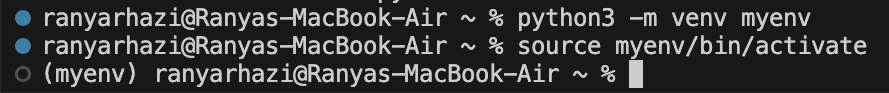

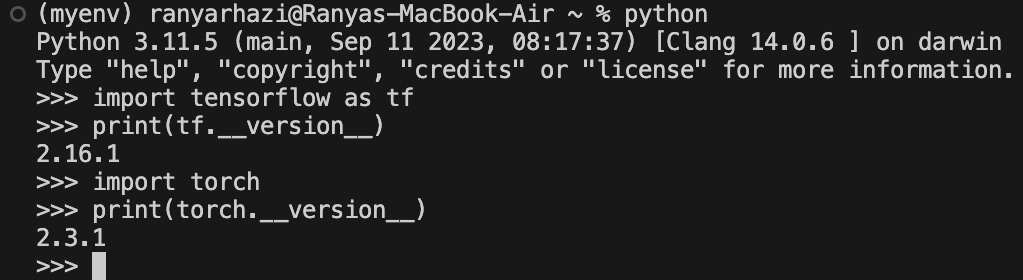

Provide snapshots from your environment showing:
1) You are using a virtual environment
2) You have installed `TensorFlow` and `PyTorch`

---

### Step 2: Verify GPU Availability
Check if TensorFlow and PyTorch can detect the GPU.

Run the following two code blocks and show the output.

#### TensorFlow GPU Check

In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("GPU is available for TensorFlow!")
else:
    print("No GPU found for TensorFlow.")


TensorFlow version: 2.15.0
GPU is available for TensorFlow!


#### PyTorch GPU Check

In [1]:
import torch

print("PyTorch version:", torch.__version__)
if torch.cuda.is_available():
    print("GPU is available for PyTorch!")
else:
    print("No GPU found for PyTorch.")


PyTorch version: 2.3.0+cu121
GPU is available for PyTorch!


---

### Step 3: Implement and Train a Simple Neural Network
#### TensorFlow Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Compile the model.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/GPU:0'):
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/10
1500/1500 [==============================] - 11s 4ms/step - loss: 0.2840 - accuracy: 0.9179 - val_loss: 0.1573 - val_accuracy: 0.9545
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1309 - accuracy: 0.9619 - val_loss: 0.1180 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.1011 - val_accuracy: 0.9702
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0647 - accuracy: 0.9810 - val_loss: 0.0955 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9849 - val_loss: 0.0912 - val_accuracy: 0.9736
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0843 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - 

#### PyTorch Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Define loss function and optimizer.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4587378.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134652.37it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:05<00:00, 305210.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8148215.90it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.1871
Epoch [2/5], Loss: 0.2223
Epoch [3/5], Loss: 0.0330
Epoch [4/5], Loss: 0.2322
Epoch [5/5], Loss: 0.0243
Test Accuracy: 96.89%


---
### Questions
Answer the following questions in detail.

1. What is the purpose of normalizing the input data in both TensorFlow and PyTorch implementations?
2. Explain the role of the activation function relu in the neural network.
3. Why is it important to use GPU for training neural networks?
4. Compare the training time and accuracy of the TensorFlow and PyTorch models. Which one performed better and why?


1. The purpose of normalizing the input data in both Tensorflow and Pytorch is to stabilize training, speed up convergence and mitigate numerical instability. This is to make sure thaat features contribute equally and make training more efficient.

2. The role of the activation function reLU is non-linearity. This is to allow the network to learn complex patterns.

3. GPUs are important for training neural networks because they accelerate training with parallrl processing, higher speed, and larger memory. They can handle intense computations of deep learning. This helps reduce training time and we are able to handle larger models and datasets.

4. For training time they approximately took the same time to execute, however in terms of performance, Tensorflow had a higher accuracy of 0.9776 vs 0.9689 for pytorch. It is not that big of a difference but it is still something we can judge upon.

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.